In [45]:
# Clean data for sentence similarity, locations, etc
import pandas as pd
import os
import re
import numpy as np

# Current directory of your code
code_directory = "/Users/jonathanold/Library/CloudStorage/GoogleDrive-jonathan_old@berkeley.edu/My Drive/_Berkeley Research/Reservations and Conflict/Github/conflict-india/code"

# Specify the relative path to the dataset from the code directory
relative_path_to_dataset = "../../../Data/_gen/dataset_satp_complete.csv"

# Create the absolute path to the dataset
dataset_path = os.path.abspath(os.path.join(code_directory, relative_path_to_dataset))
print(dataset_path)
# Now you can read the dataset using dataset_path
# For example, assuming you are using pandas to read a CSV file:
import pandas as pd

dataset = pd.read_csv(dataset_path, sep=';')

# Print the first few rows of the dataset
print(dataset.head())

/Users/jonathanold/Library/CloudStorage/GoogleDrive-jonathan_old@berkeley.edu/My Drive/_Berkeley Research/Reservations and Conflict/Data/_gen/dataset_satp_complete.csv
                                         description    year
0  A lower rung Communist Party of India-Maoist (...  2023.0
1  An old mortar shell was found 150 metres away ...  2023.0
2  Communist Party of India-Maoist (CPI-Maoist) c...  2023.0
3  On January 1, a civilian, identified as Sameer...  2023.0
4  On January 1, a Pakistani drone was spotted by...  2023.0


In [46]:
# Define a function to remove the specified pattern
def remove_pattern(text):
    return re.sub(r',\s*reports.*', '', str(text))  # Convert to string

dataset['descr_short'] = dataset['description'].apply(remove_pattern)

print(dataset.head())

                                         description    year  \
0  A lower rung Communist Party of India-Maoist (...  2023.0   
1  An old mortar shell was found 150 metres away ...  2023.0   
2  Communist Party of India-Maoist (CPI-Maoist) c...  2023.0   
3  On January 1, a civilian, identified as Sameer...  2023.0   
4  On January 1, a Pakistani drone was spotted by...  2023.0   

                                         descr_short  
0  A lower rung Communist Party of India-Maoist (...  
1  An old mortar shell was found 150 metres away ...  
2  Communist Party of India-Maoist (CPI-Maoist) c...  
3  On January 1, a civilian, identified as Sameer...  
4  On January 1, a Pakistani drone was spotted by...  


Dataset has been written to /Users/jonathanold/Library/CloudStorage/GoogleDrive-jonathan_old@berkeley.edu/My Drive/_Berkeley Research/Reservations and Conflict/Data/_gen/dataset_satp_clean_for_similarity.csv


In [47]:
def split_into_sentences(text):
    # This regex will split the text on sentence-ending punctuation
    return re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', str(text))

def filter_sentences(paragraph, keywords):
    sentences = split_into_sentences(paragraph)
    filtered_sentences = [sentence for sentence in sentences if any(keyword in sentence for keyword in keywords)]
    return ' '.join(filtered_sentences)

# List of strings to check
keywords = [
    "abduct", "ambush", "arrest", "assassin", "assault", "attack", "attempt",
    "beat up", "beaten", "beaten up", "blast", "blew up", "blow up", "blowing up", "blown up",
    "bomb", "bombard", "boycott", "brand", "burn", "burnt", "burnt down", "bust",
    "carried out", "claim", "clash", "comb", "damag", "defus", "demolish", "desert",
    "detain", "deton", "encount", "ensu", "erupt", "escap", "execut", "explod",
    "extort", "fight", "fire", "fled", "flee", "gunned down", "hijack", "hit",
    "hurl", "hurt", "imprison", "improvis", "infiltr", "injur", "intimid", "kidnap",
    "kill", "laid", "laid down", "launch", "lob", "loot", "lynch", "massacr",
    "murder", "neutral", "neutralis", "propag", "protest", "raid", "rape", "recov",
    "retali", "rob", "seiz", "set", "set ablaz", "shell", "shot", "shot down", "shut down",
    "slit", "smash", "stab", "storm", "strike", "struck", "struggl", "succumb", "suffer",
    "surrend", "sustain", "threaten", "tipped off", "torch", "tortur", "trap", "trigger",
    "went off", "wound", "agitat", "deploy", "dead"
]

# Apply sentence filter
dataset['descr_action'] = dataset['description'].apply(lambda x: filter_sentences(x, keywords))



In [34]:

relative_path_to_dataset = "../../../Data/_gen/dataset_satp_clean_for_similarity.csv"
output_file_path = os.path.abspath(os.path.join(code_directory, relative_path_to_dataset))

# Write the modified DataFrame to a CSV file
dataset.to_csv(output_file_path, index=False)

print(f"Dataset has been written to {output_file_path}")

Dataset has been written to /Users/jonathanold/Library/CloudStorage/GoogleDrive-jonathan_old@berkeley.edu/My Drive/_Berkeley Research/Reservations and Conflict/Data/_gen/dataset_satp_clean_for_similarity.csv


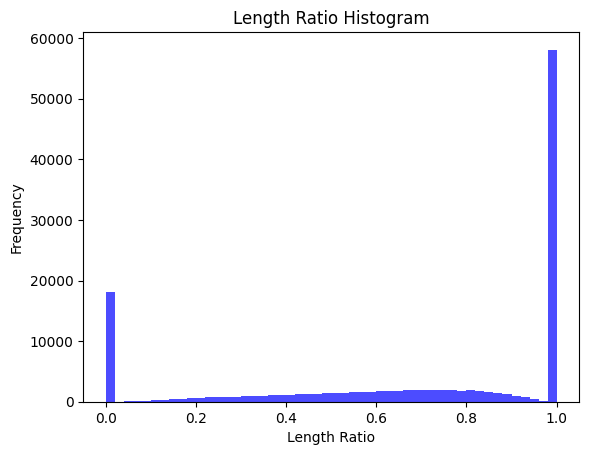

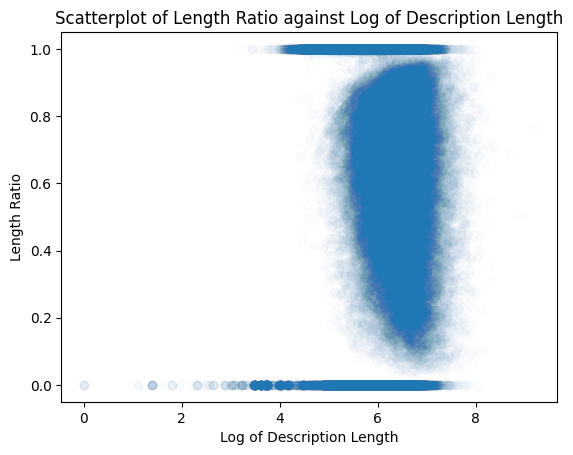

0.6929994929419518


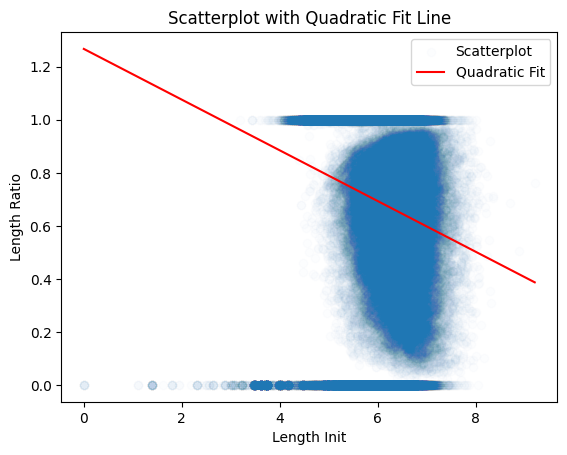

In [66]:
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset and created 'descr_action' column

# Calculate the length ratio: How much space do we save?
dataset['length_ratio'] = dataset['descr_action'].apply(lambda x: len(str(x))) / dataset['description'].apply(lambda x: len(str(x)))
dataset['length_init'] = np.log(dataset['description'].apply(lambda x: len(str(x))))

# Plot a histogram
plt.hist(dataset['length_ratio'], bins=50, color='blue', alpha=0.7)
plt.title('Length Ratio Histogram')
plt.xlabel('Length Ratio')
plt.ylabel('Frequency')
plt.show()

# Plot a scatterplot
plt.scatter(dataset['length_init'], dataset['length_ratio'], alpha=0.01)
plt.title('Scatterplot of Length Ratio against Log of Description Length')
plt.xlabel('Log of Description Length')
plt.ylabel('Length Ratio')
plt.show()




print(dataset['length_ratio'].mean())



# Fit a quadratic line of best fit to the data
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from numpy.polynomial import Polynomial

# Reshape 'length_init' for scikit-learn
X = dataset['length_init'].values.reshape(-1, 1)

# Fit a quadratic line of best fit to the data
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, dataset['length_ratio'])

# Generate x values for the line of best fit
x_values = np.linspace(min(X), max(X), 100).reshape(-1, 1)
x_values_poly = poly.transform(x_values)

# Calculate y values using the quadratic fit
y_values = model.predict(x_values_poly)

# Plot the scatterplot
plt.scatter(X, dataset['length_ratio'], alpha=0.01, label='Scatterplot')

# Plot the quadratic line of best fit
plt.plot(x_values, y_values, color='red', label='Quadratic Fit')

plt.title('Scatterplot with Quadratic Fit Line')
plt.xlabel('Length Init')
plt.ylabel('Length Ratio')
plt.legend()
plt.show()